Model Performance Metrics:
R-squared Train: 0.999560600776604
R-squared Test: 0.9971240030697465
Mean Squared Error Train: 26278904.571594298
Mean Squared Error Test: 68650570.11560915
Root Mean Squared Error Train: 5126.295404246062
Root Mean Squared Error Test: 8285.563958814702
Cross-Validation R2 Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation R2 Score: 0.9999999999999998

Feature Importance:
                          Feature    Importance
2                              KP  41632.098170
0                          Punjab  34997.030910
1                           Sindh  30932.663968
7                             AJK  28772.282071
3                     Balochistan  26101.403743
6                             G.B  25967.335160
16   Offence_TOTAL RECORDED CRIME  23823.190523
4                       Islamabad  20338.973749
14                 Offence_Others  17333.144911
5                        Railways  10698.532642
13            Offence_Other Theft   3539.494657
15                Offence

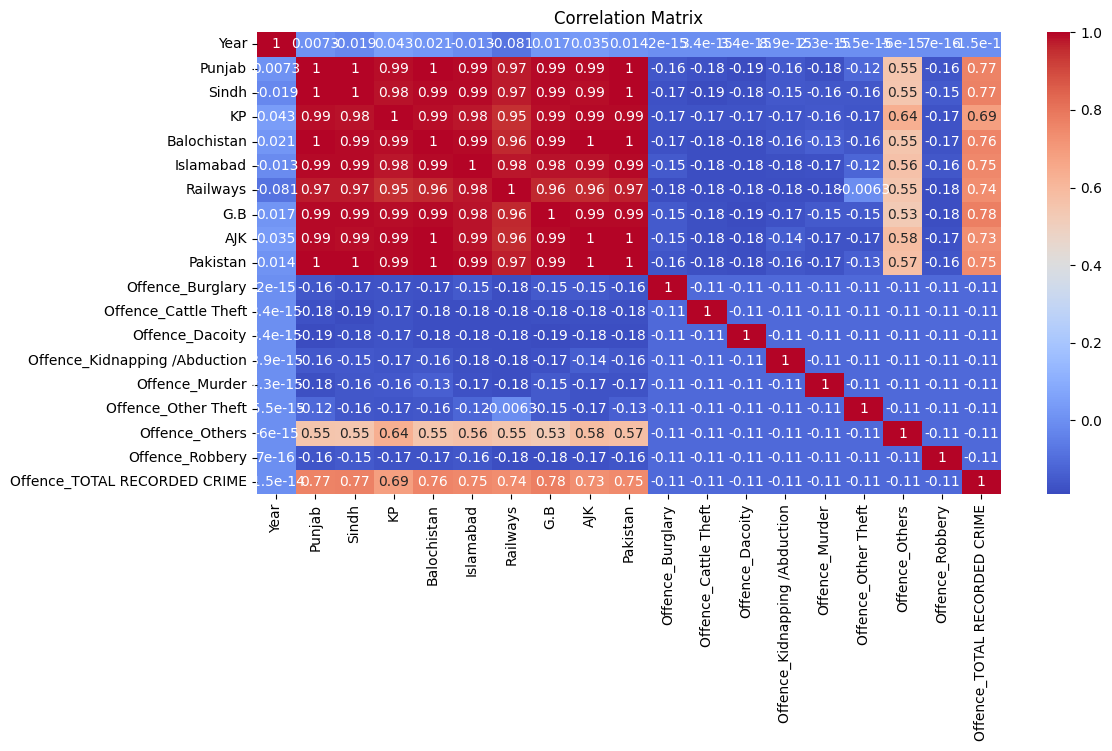

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/pakistna-crime-data.csv')

# Convert Offence to one-hot encoding
df = pd.get_dummies(df, columns=['Offence'], drop_first=True)

# Prepare features and target
X = df.drop(['Year', 'Pakistan'], axis=1)
y = df['Pakistan']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression with alpha = 1.0
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Predictions for training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics for training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Print performance metrics
print("Model Performance Metrics:")
print(f"R-squared Train: {r2_train}")
print(f"R-squared Test: {r2_test}")
print(f"Mean Squared Error Train: {mse_train}")
print(f"Mean Squared Error Test: {mse_test}")
print(f"Root Mean Squared Error Train: {rmse_train}")
print(f"Root Mean Squared Error Test: {rmse_test}")

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cv_scores)}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_)
})
print("\nFeature Importance:")
print(feature_importance.sort_values('Importance', ascending=False))

# Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Dataset
file_path = '/content/Islamabad_Crime_Records_1000000.csv'
df = pd.read_csv(file_path)

# --- Data Preprocessing for Time Series ---
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Aggregate data by Date and count the number of crimes per day
time_series_data = df.groupby('Date').size().reset_index(name='Crime_Count')

# Sort data by date
time_series_data = time_series_data.sort_values(by='Date')

# Prepare Data for Time Series Modeling
# Normalize the crime count data
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_data['Crime_Count_Normalized'] = scaler.fit_transform(time_series_data[['Crime_Count']])

# Create Sequences for LSTM
sequence_length = 30  # Number of previous days to consider
data = time_series_data['Crime_Count_Normalized'].values

X = []
y = []
for i in range(sequence_length, len(data)):
    X.append(data[i-sequence_length:i])  # Last 'sequence_length' days
    y.append(data[i])  # Target: Crime count for the next day

X = np.array(X)
y = np.array(y)

# Reshape X for LSTM input: [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into Train and Test
train_size = int(len(X) * 0.8)  # 80% training, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- Build the LSTM Model ---
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# --- Train the Model ---
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# --- Evaluate the Model ---
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# --- Predictions ---
y_pred = model.predict(X_test)

# Rescale predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# --- Visualize Predictions ---
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['Date'][-len(y_test):], y_test_rescaled, label='Actual')
plt.plot(time_series_data['Date'][-len(y_test):], y_pred_rescaled, label='Predicted')
plt.legend()
plt.title('Crime Count Prediction')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.show()


ParserError: Error tokenizing data. C error: EOF inside string starting at row 465342

<ipython-input-3-86de0da6b54e>:12: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
16718/16718 ━━━━━━━━━━━━━━━━━━━━ 577s 34ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/20
16718/16718 ━━━━━━━━━━━━━━━━━━━━ 559s 33ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
16718/16718 ━━━━━━━━━━━━━━━━━━━━ 560s 33ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/20
16718/16718 ━━━━━━━━━━━━━━━━━━━━ 544s 32ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
16718/16718 ━━━━━━━━━━━━━━━━━━━━ 542s 32ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/20
16718/16718 ━━━━━━━━━━━━━━━━━━━━ 547s 33ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
16718/16718 ━━━━━━━━━━━━━━━━━━━━ 563s 33ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/20
16718/16718 ━━━━━━━━━━━━━━━━━━━━ 561s 33ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
16718/16718 ━━━━━━━━━━━━━━━━━━━━ 561s 33ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/20
16718/16718 ━━━━━━━━━━━━━━━━━━━━ 565s 33ms/step - loss: 0.0000e+00 - val_loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Metrics:
Accuracy: 1.00
Precision: 0.00
F1-Score: 0.00


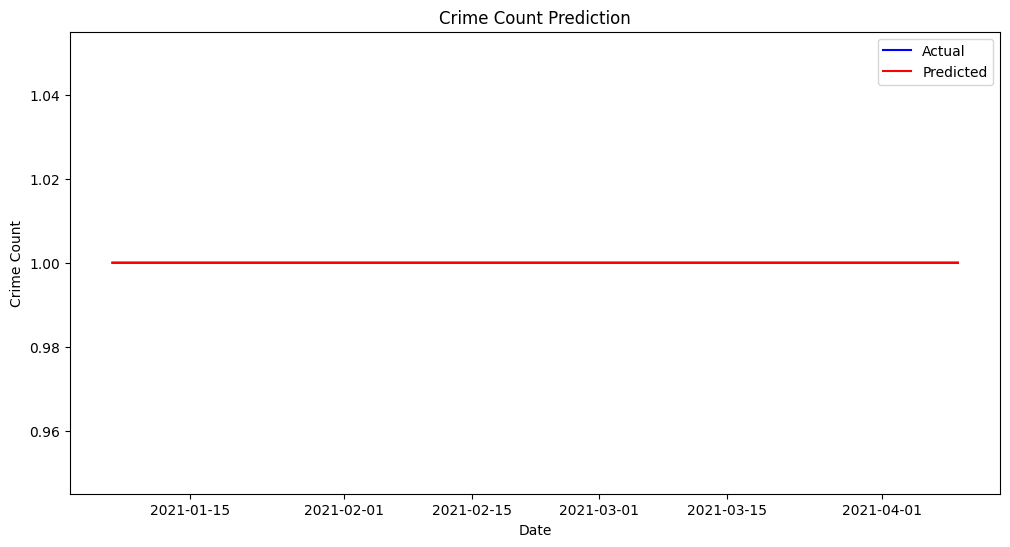

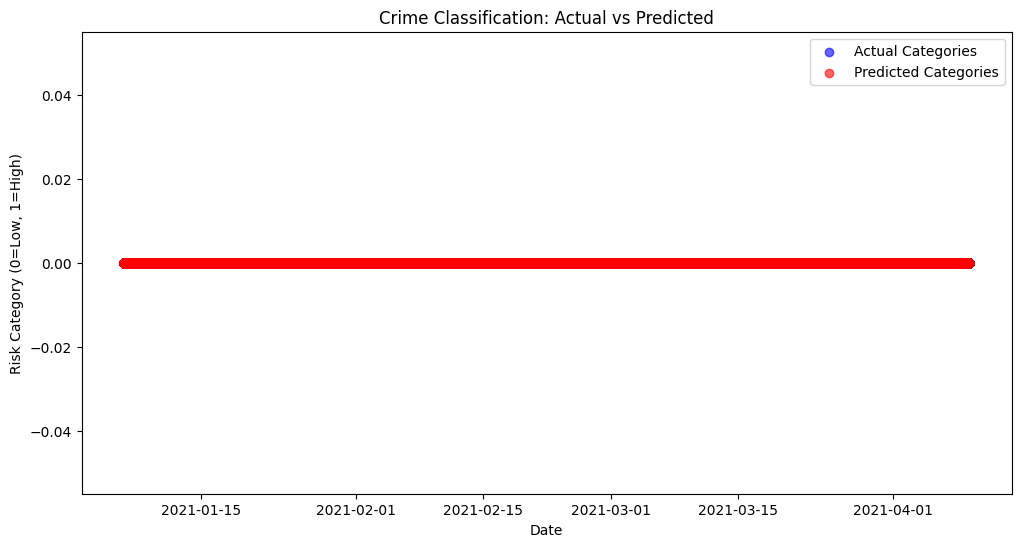

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- Load and Preprocess Data ---
file_path = '/content/sample_data/Islamabad_Crime_Records_2M.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Aggregate data by Date and count crimes per day
time_series_data = df.groupby('Date').size().reset_index(name='Crime_Count')

# Sort data by Date
time_series_data = time_series_data.sort_values(by='Date')

# Normalize the crime count data
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_data['Crime_Count_Normalized'] = scaler.fit_transform(time_series_data[['Crime_Count']])

# --- Prepare Sequences for LSTM ---
sequence_length = 30  # Number of previous days to consider
data = time_series_data['Crime_Count_Normalized'].values

X = []
y = []
for i in range(sequence_length, len(data)):
    X.append(data[i-sequence_length:i])  # Last 'sequence_length' days
    y.append(data[i])  # Target: Crime count for the next day

X = np.array(X)
y = np.array(y)

# Reshape X for LSTM input: [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into Train and Test Sets
train_size = int(len(X) * 0.8)  # 80% training, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- Build and Train the LSTM Model ---
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# --- Evaluate Model ---
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make Predictions
y_pred = model.predict(X_test)

# Rescale predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# --- Classification Metrics ---
# Define a threshold for classification (e.g., high crime risk if count > 10)
threshold = 10
y_pred_classified = (y_pred_rescaled >= threshold).astype(int)  # Predicted risk categories
y_test_classified = (y_test_rescaled >= threshold).astype(int)  # Actual risk categories

# Calculate Accuracy, Precision, and F1-Score
accuracy = accuracy_score(y_test_classified, y_pred_classified)
precision = precision_score(y_test_classified, y_pred_classified)
f1 = f1_score(y_test_classified, y_pred_classified)

print(f"\nClassification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")

# --- Visualize Predictions ---
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Date'][-len(y_test):], y_test_rescaled, label='Actual', color='blue')
plt.plot(time_series_data['Date'][-len(y_test):], y_pred_rescaled, label='Predicted', color='red')
plt.title('Crime Count Prediction')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.show()

# --- Visualize Classification ---
plt.figure(figsize=(12, 6))
plt.scatter(time_series_data['Date'][-len(y_test):], y_test_classified, label='Actual Categories', color='blue', alpha=0.6)
plt.scatter(time_series_data['Date'][-len(y_test):], y_pred_classified, label='Predicted Categories', color='red', alpha=0.6)
plt.title('Crime Classification: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Risk Category (0=Low, 1=High)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv("/content/sample_data/Islamabad_Crime_Records_2M.csv")

# Check for missing values and drop rows with critical missing data
df.dropna(subset=['Primary Type', 'Date'], inplace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract time-based features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.weekday

# Drop unnecessary columns
columns_to_drop = ['Case Number', 'Updated On', 'Location', 'Date']
df.drop(columns=columns_to_drop, inplace=True)

# Encode the 'Description' column
df['Description'] = LabelEncoder().fit_transform(df['Description'])

# Label encoding for the target variable ('Primary Type')
label_encoder = LabelEncoder()
df['Primary Type'] = label_encoder.fit_transform(df['Primary Type'])

# One-hot encoding for categorical features
categorical_columns = ['Location Description', 'Block', 'IUCR', 'FBI Code']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Confirm all columns are numeric
print("Data types after encoding:")
print(df.dtypes)

# Separate features (X) and target (y)
X = df.drop(columns=['Primary Type'])
y = df['Primary Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Decode predictions back to original labels (optional)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Print sample predictions
print("Sample Predictions:")
print(y_pred_labels[:10])

<ipython-input-2-90518ad1005c>:8: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/sample_data/Islamabad_Crime_Records_2M.csv")


Data types after encoding:
Primary Type      int64
Description       int64
Arrest           object
Domestic         object
Beat            float64
                 ...   
FBI Code_8D        bool
FBI Code_9A        bool
FBI Code_9B        bool
FBI Code_9C        bool
FBI Code_9D        bool
Length: 958, dtype: object
              precision    recall  f1-score   support

           0       0.24      0.29      0.26      3115
           1       0.25      0.24      0.24      3112
           2       0.25      0.22      0.23      3200
           3       0.26      0.24      0.25      3191

    accuracy                           0.25     12618
   macro avg       0.25      0.25      0.25     12618
weighted avg       0.25      0.25      0.25     12618

Sample Predictions:
['ASSAULT' 'BATTERY' 'ASSAULT' 'THEFT' 'PUBLIC PEACE VIOLATION' 'ASSAULT'
 'BATTERY' 'THEFT' 'BATTERY' 'ASSAULT']


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load Dataset
chicago = pd.read_csv("/content/sample_data/Islamabad_Crime_Records_2M.csv", low_memory=False)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Inspect the columns
print("Columns in dataset:", chicago.columns)

# Drop Irrelevant Columns
drop_columns = ['Unnamed: 0', 'ID', 'Case Number', 'IUCR', 'FBI Code', 'Block',
                'Location', 'Updated On', 'X Coordinate', 'Y Coordinate',
                'Beat', 'Ward', 'Community Area']
chicago.drop(columns=[col for col in drop_columns if col in chicago.columns], inplace=True)

# Ensure 'Date' column is available before processing
if 'Date' in chicago.columns:
    chicago['date'] = pd.to_datetime(chicago['Date'], errors='coerce')
    chicago['Year'] = chicago['date'].dt.year
    chicago['Month'] = chicago['date'].dt.month
    chicago['Day'] = chicago['date'].dt.day
    chicago['Hour'] = chicago['date'].dt.hour
    chicago['Minute'] = chicago['date'].dt.minute
    chicago['Second'] = chicago['date'].dt.second
    chicago.drop(columns=['Date', 'date'], inplace=True)
else:
    print("The 'Date' column is missing in the dataset.")

# Encode categorical features
chicago['Description'] = pd.factorize(chicago["Description"])[0]
chicago['Location Description'] = pd.factorize(chicago["Location Description"])[0]
chicago['Arrest'] = chicago['Arrest'].map({True: 1, False: 0})
chicago['Domestic'] = chicago['Domestic'].map({True: 1, False: 0})

# Encode District and concatenate
le = LabelEncoder()
if 'District' in chicago.columns:
    Districts = le.fit_transform(chicago['District'])
    chicago['Districts'] = Districts
    chicago.drop(columns=['District'], inplace=True)

# Remove NaN values
chicago.dropna(inplace=True)

# Save preprocessed data
chicago.to_csv("Dataforann.csv", index=False)

# Data Splitting
x = chicago[['Latitude', 'Longitude', 'Districts', 'Arrest', 'Location Description',
             'Description', 'Year', 'Month', 'Day', 'Hour', 'Minute']]
y = chicago['Primary Type']
x_trainval, x_test, y_trainval, y_test = train_test_split(
    x, y, train_size=0.80, test_size=0.20, random_state=45, shuffle=True)

# Decision Tree Classifier
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_trainval, y_trainval)
pytest = dt.predict(x_test)

# Evaluation Metrics
print("Test Accuracy:", accuracy_score(y_test, pytest))
print("Precision:", precision_score(y_test, pytest, average='micro'))
print("Recall:", recall_score(y_test, pytest, average='micro'))
print("F1 Score:", f1_score(y_test, pytest, average='micro'))


Columns in dataset: Index(['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')
Test Accuracy: 0.2502205373959898
Precision: 0.2502205373959898
Recall: 0.2502205373959898
F1 Score: 0.2502205373959898


In [4]:
print(chicago.columns)

Index(['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
data_path = "/content/sample_data/Islamabad_Crime_Records_2M.csv"
pakistan = pd.read_csv(data_path, low_memory=False)

# Inspect Dataset
print("Columns in dataset:", pakistan.columns)

# Drop Irrelevant Columns
drop_columns = ['Case Number', 'IUCR', 'FBI Code', 'Block', 'Location', 'Updated On',
                'X Coordinate', 'Y Coordinate', 'Beat', 'Ward', 'Community Area']
pakistan.drop(columns=[col for col in drop_columns if col in pakistan.columns], inplace=True)

# Handle Date Column
if 'Date' in pakistan.columns:
    pakistan['date'] = pd.to_datetime(pakistan['Date'], errors='coerce')
    pakistan['Year'] = pakistan['date'].dt.year
    pakistan['Month'] = pakistan['date'].dt.month
    pakistan['Day'] = pakistan['date'].dt.day
    pakistan['Hour'] = pakistan['date'].dt.hour
    pakistan.drop(columns=['Date', 'date'], inplace=True)

# Encode Categorical Features
pakistan['Description'] = pd.factorize(pakistan['Description'])[0]
pakistan['Location Description'] = pd.factorize(pakistan['Location Description'])[0]
pakistan['Arrest'] = pakistan['Arrest'].map({True: 1, False: 0})
pakistan['Domestic'] = pakistan['Domestic'].map({True: 1, False: 0})

# Encode District
le = LabelEncoder()
if 'District' in pakistan.columns:
    pakistan['Districts'] = le.fit_transform(pakistan['District'])
    pakistan.drop(columns=['District'], inplace=True)

# Remove NaN Values
pakistan.dropna(inplace=True)

# Feature and Target Selection
x = pakistan[['Latitude', 'Longitude', 'Districts', 'Arrest', 'Location Description',
             'Description', 'Year', 'Month', 'Day', 'Hour']]
y = pakistan['Primary Type']

# Train-Test Split
x_trainval, x_test, y_trainval, y_test = train_test_split(x, y, train_size=0.80, test_size=0.20, random_state=45, shuffle=True)

# Random Forest Classifier with Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_trainval, y_trainval)

# Best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the Final Model
best_rf = grid_search.best_estimator_
best_rf.fit(x_trainval, y_trainval)

# Evaluate the Model
y_pred = best_rf.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='micro'))
print("Recall:", recall_score(y_test, y_pred, average='micro'))
print("F1 Score:", f1_score(y_test, y_pred, average='micro'))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Columns in dataset: Index(['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')
Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/Islamabad_Crime_Records_2M.csv')

# Convert Offence to one-hot encoding
df = pd.get_dummies(df, columns=['Offence'], drop_first=True)

# Prepare features and target
X = df.drop(['Year', 'Pakistan'], axis=1)
y = df['Pakistan']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression with alpha = 1.0
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Predictions for training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics for training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Print performance metrics
print("Model Performance Metrics:")
print(f"R-squared Train: {r2_train}")
print(f"R-squared Test: {r2_test}")
print(f"Mean Squared Error Train: {mse_train}")
print(f"Mean Squared Error Test: {mse_test}")
print(f"Root Mean Squared Error Train: {rmse_train}")
print(f"Root Mean Squared Error Test: {rmse_test}")

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cv_scores)}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_)
})
print("\nFeature Importance:")
print(feature_importance.sort_values('Importance', ascending=False))

# Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Islamabad_Crime_Records_2M.csv'